In [1]:
using Pkg
pkg"activate .."
using Plots
using Random

 Activating environment at `~/Berlin-dev/BeneathBeyondML/Project.toml`


In [2]:
# using Revise
using Polymake

┌ Info: Precompiling Polymake [d720cf60-89b5-51f5-aff5-213f193123e7]
└ @ Base loading.jl:1278
Term::Cap->Tgetent failed for TERM xterm-256color: Can't find a valid termcap file at /home/kalmar/.julia/artifacts/eb44608582f284a712e85f226d09d4d2ada2f06c/share/polymake/perllib/Polymake/Core/InteractiveCommands.pm line 32.
[ Info: Generating module common
[ Info: Generating module ideal
[ Info: Generating module graph
[ Info: Generating module fulton
[ Info: Generating module fan
[ Info: Generating module group
[ Info: Generating module polytope
[ Info: Generating module topaz
[ Info: Generating module tropical
[ Info: Generating module matroid


polymake version 4.1
Copyright (c) 1997-2020
Ewgenij Gawrilow, Michael Joswig, and the polymake team
Technische Universität Berlin, Germany
https://polymake.org

This is free software licensed under GPL; see the source for copying conditions.
There is NO warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [3]:
# using JLD
# times, triangulation_size = load("cube_10.jld", "times", "triangulation_size");

In [28]:
function bb_triangulation_size(verts, perm=1:size(verts,1))
    bb = Polymake.BeneathBeyond(verts, perm=perm)
    for _ in bb
        nothing
    end
    return Polymake.triangulation_size(bb)
end

bb_triangulation_size (generic function with 2 methods)

In [29]:
rs = polytope.rand_sphere(4, 30);
pts = rs.VERTICES

min_perm = collect(1:size(pts, 1))
min_size = bb_triangulation_size(pts, min_perm)

232

In [36]:
min_size, min_perm, sizes = let pts=pts, RUNS=5000, min_perm=min_perm, min_size=min_size
    sizes = Int[]
#     for i in 1:1000
        for _ in 1:RUNS
            perm = randperm(size(pts, 1))
            s = bb_triangulation_size(pts, perm)
            push!(sizes, s)
            if s < min_size
                min_size = s
                min_perm .= perm
            end
        end
#         @show i, min_size
#     end
    min_size, min_perm, sizes
end

(176, [3, 6, 10, 27, 24, 2, 12, 21, 11, 1  …  30, 19, 13, 26, 14, 20, 28, 15, 18, 23], [218, 222, 234, 232, 196, 234, 230, 230, 220, 254  …  214, 228, 216, 226, 206, 234, 214, 224, 234, 220])

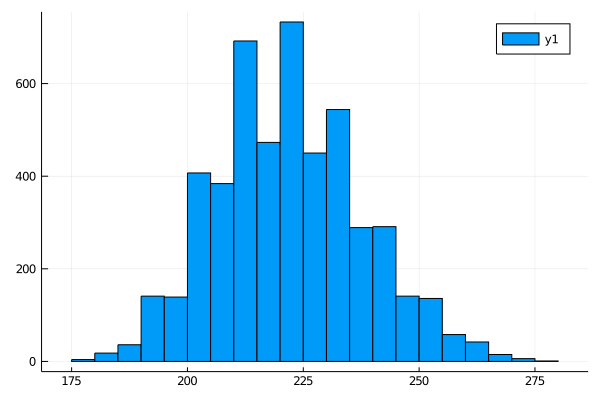

In [37]:
histogram(sizes)

In [26]:
bb = Polymake.BeneathBeyond(rs.VERTICES);

In [5]:
_, s = iterate(bb)

(nothing, 2)

In [22]:
_, s = iterate(bb, s)

(nothing, 16)

In [23]:
Polymake.triangulation_size(bb)

67

In [25]:
@time collect(bb);

  0.086647 seconds (159.68 k allocations: 2.843 MiB, 40.48% gc time)


In [38]:
N = 6
p = polytope.cube(N)
pts = p.VERTICES

min_perm = collect(1:size(pts, 1))
min_size = bb_triangulation_size(pts, min_perm)

720

In [40]:
min_size, min_perm, sizes = let pts=pts, RUNS=500, min_perm=min_perm, min_size=min_size
    sizes = Int[]
    for i in 1:100
        for _ in 1:RUNS
            perm = randperm(size(pts, 1))
            s = bb_triangulation_size(pts, perm)
            push!(sizes, s)
            if s < min_size
                min_size = s
                min_perm .= perm
            end
        end
        @show i, min_size
    end
    min_size, min_perm, sizes
end

(i, min_size) = (1, 532)
(i, min_size) = (2, 530)
(i, min_size) = (3, 529)
(i, min_size) = (4, 524)
(i, min_size) = (5, 524)
(i, min_size) = (6, 524)
(i, min_size) = (7, 524)
(i, min_size) = (8, 524)
(i, min_size) = (9, 524)
(i, min_size) = (10, 524)
(i, min_size) = (11, 524)
(i, min_size) = (12, 524)
(i, min_size) = (13, 524)
(i, min_size) = (14, 524)
(i, min_size) = (15, 524)
(i, min_size) = (16, 524)
(i, min_size) = (17, 524)
(i, min_size) = (18, 524)
(i, min_size) = (19, 524)
(i, min_size) = (20, 521)
(i, min_size) = (21, 521)
(i, min_size) = (22, 521)
(i, min_size) = (23, 521)
(i, min_size) = (24, 521)
(i, min_size) = (25, 521)
(i, min_size) = (26, 521)
(i, min_size) = (27, 521)
(i, min_size) = (28, 521)
(i, min_size) = (29, 517)
(i, min_size) = (30, 517)
(i, min_size) = (31, 517)
(i, min_size) = (32, 517)
(i, min_size) = (33, 517)
(i, min_size) = (34, 517)
(i, min_size) = (35, 517)
(i, min_size) = (36, 517)
(i, min_size) = (37, 517)
(i, min_size) = (38, 517)
(i, min_size) = (39, 

(495, [39, 27, 41, 21, 26, 38, 22, 63, 61, 15  …  57, 11, 37, 64, 47, 7, 5, 6, 55, 53], [613, 625, 579, 630, 625, 623, 610, 580, 696, 665  …  631, 623, 578, 635, 644, 594, 641, 653, 629, 597])

In [24]:
string(min_perm)
# "[6, 1, 7, 25, 11, 13, 16, 24, 10, 19, 30, 4, 21, 2, 3, 31, 18, 28, 20, 26, 9, 5, 14, 29, 32, 17, 15, 22, 27, 12, 23, 8]"

"[6, 1, 7, 25, 11, 13, 16, 24, 10, 19, 30, 4, 21, 2, 3, 31, 18, 28, 20, 26, 9, 5, 14, 29, 32, 17, 15, 22, 27, 12, 23, 8]"

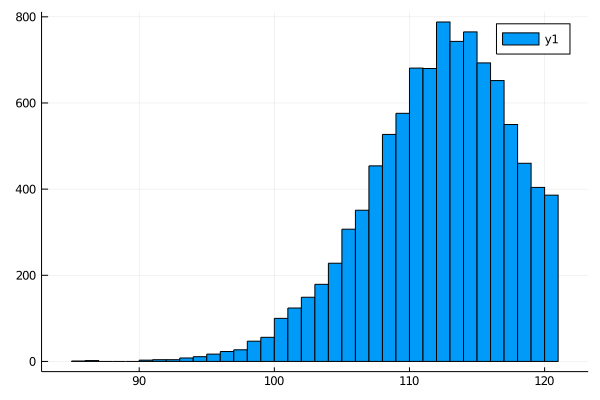

In [13]:
histogram(sizes)

## Timing iterations

In [ ]:
times, triangulation_size = let N = 8, p = polytope.cube(N), seed=1234
    Random.seed!(seed)
    bb = Polymake.BeneathBeyond(p.VERTICES, perm=randperm(size(p.VERTICES, 1)))
    
    times = Float64[]
    triangulation_size = Int[]
    val = iterate(bb)
    while !isnothing(val)
        _, state = val
        val, time, _ = @timed iterate(bb, state)
        push!(times, time)
        push!(triangulation_size, Polymake.triangulation_size(bb.algo))
    end
    times, triangulation_size
end;

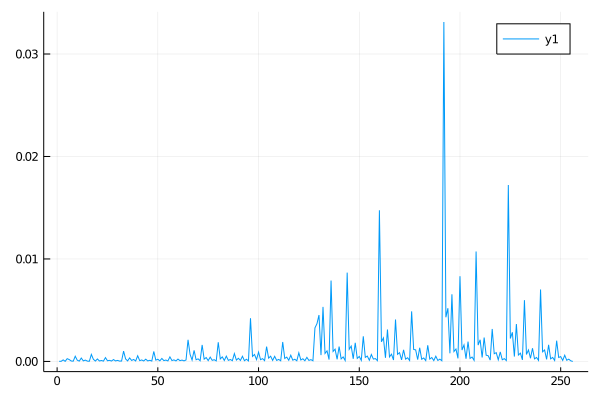

In [17]:
plot(times, 
#     yaxis=:log10
)

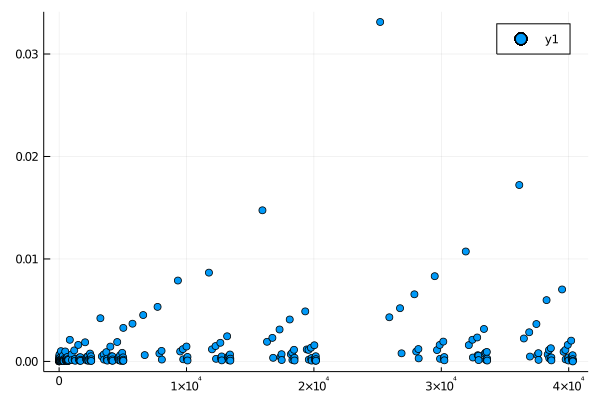

In [19]:
scatter(triangulation_size, times, 
#     yaxis=:log10,
)